## 1. Definição do Problema

A Análise da Personalidade do Cliente é uma análise detalhada dos clientes ideais de uma empresa. Ele ajuda uma empresa a entender melhor seus clientes e facilita a modificação de produtos de acordo com as necessidades, comportamentos e preocupações específicas de diferentes tipos de clientes.

A análise da personalidade do cliente ajuda uma empresa a modificar seu produto com base em seus clientes-alvo de diferentes tipos de segmentos de clientes. Por exemplo, em vez de gastar dinheiro para comercializar um novo produto para cada cliente no banco de dados da empresa, uma empresa pode analisar qual segmento de cliente tem maior probabilidade de comprar o produto e, então, comercializar o produto apenas naquele segmento específico.

Alvo
*Necessidade de realizar clustering para resumir os segmentos de clientes.*

### 1.1 Conteúdo dos dados 

People

- ID: Identificador exclusivo do cliente
- Year_Birth: Ano de nascimento do cliente
- Education: nível de educação do cliente
- Marital_Status: estado civil do cliente
- Income: renda familiar anual do cliente
- Kidhome: número de crianças na casa do cliente
- Teenhome: número de adolescentes na casa do cliente
- Dt_Customer: Data de cadastro do cliente na empresa
- Recency: número de dias desde a última compra do cliente
- Complain: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário

Products

- MntWines: Valor gasto em vinho nos últimos 2 anos
- MntFruits: Valor gasto em frutas nos últimos 2 anos
- MntMeatProducts: Valor gasto em carne nos últimos 2 anos
- MntFishProducts: Amount spent on peixe in last 2 years
- MntSweetProducts: Amount spent on doces in last 2 years
- MntGoldProds: Amount spent on ouro in last 2 years

Promotion

- NumDealsPurchases: Número de compras feitas com desconto
- AcceptedCmp1: 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário
- AcceptedCmp2: 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário
- AcceptedCmp3: 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário
- AcceptedCmp4: 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário
- AcceptedCmp5: 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário
- Response: 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário

Place

- NumWebPurchases: Número de compras realizadas através do site da empresa
- NumCatalogPurchases: Número de compras feitas usando um catálogo
- NumStorePurchases: Número de compras feitas diretamente nas lojas
- NumWebVisitsMonth: Número de visitas ao site da empresa no último mês


Referência: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

### 2.0 Importando as bibliotecas e carregando os dados

In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [3]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 1.0 Carregando o Dataset

In [4]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('marketing_campaign.csv', sep = '\t', parse_dates=['Dt_Customer'])
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [6]:
print("A data de inscrição do cliente mais recente nos registros:",df['Dt_Customer'].max())
print("A data de inscrição do cliente mais antigo nos registros:",df['Dt_Customer'].min())

A data de inscrição do cliente mais recente nos registros: 2014-12-06 00:00:00
A data de inscrição do cliente mais antigo nos registros: 2012-01-08 00:00:00


### 2.1 Descobrindo a quantidade de dados Nulos em cada coluna

In [7]:
#Existem 24 registros nulos sobre a renda anual.
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Para preencher esses valores nulos eu utilizarei uma técnica de preenchimento com valores não existentes na base, é uma das opções viáveis para não perder os dados e ao mesmo tempo não generalizar utilizando média ou mediana.

In [8]:
next_num = df['Income'].min() + 500
df['Income'] = df['Income'].fillna(next_num)

### 2.2 Tratando o tipo de dado de cada coluna

Para agilizar o tratamento, todas as colunas que só possuem duas e são variáveis numéricas serão transformadas em categóricas, pois são colunas booleanas

In [9]:
for col in df.columns:
    # Verificar se a coluna tem apenas dois valores exclusivos
    if df[col].nunique() == 2:
        # Verificar se a coluna é numérica
        if pd.api.types.is_numeric_dtype(df[col]):
            # Converter a coluna em categórica
            df[col] = df[col].astype(object)

### 3.0 Análise Descritiva dos Dados

In [10]:
df1 = df.copy()

In [11]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64','datetime64[ns]'] )

In [12]:
num_attributes.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0
mean,5592.159821,1968.805804,51711.352232,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,3.0,11.0
std,3246.662198,11.984069,25562.084099,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.0,0.0
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
25%,2828.250000,1959.000000,34722.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,3.0,11.0
50%,5458.500000,1970.000000,51075.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,3.0,11.0
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,3.0,11.0
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,3.0,11.0


In [13]:
cat_attributes.describe()

,Education,Marital_Status,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240,2240,2240,2240,2240,2240,2240,2240,2240
unique,5,8,2,2,2,2,2,2,2
top,Graduation,Married,0,0,0,0,0,0,0
freq,1127,864,2077,2073,2077,2096,2210,2219,1906


### 4.0 Feature Engineering

In [14]:
#Criar uma coluna de idade para cada pessoa
from datetime import date
df1['age'] = date.today().year - df1['Year_Birth']

#Criando o total de gastos
df1["Spent"] = df1["MntWines"]+ df1["MntFruits"]+ df1["MntMeatProducts"]+ df1["MntFishProducts"]+ df1["MntSweetProducts"]+ df1["MntGoldProds"]

### 5.0 Pré-processamento dos dados

In [15]:
df1['Income'] = df1['Income'].astype('int64')

In [16]:
df1 = df1.drop('Dt_Customer',axis = 1)

### 5.1 Pipeline

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, RobustScaler,LabelEncoder
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans

variaveis_numericas = df1.select_dtypes( include=['int64', 'float64'] ).columns
variaveis_categoricas = df1.select_dtypes( exclude=['int64', 'float64','datetime64[ns]'] ).columns

pipeline_categoricas = Pipeline([
    ('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

# Tratamento para numéricas
pipeline_numericas = Pipeline([
    ('scaler', StandardScaler())
])


t = [('str_categoricas', pipeline_categoricas, variaveis_categoricas),
     ('int_numericas', pipeline_numericas, variaveis_numericas)]

preprocessor = ColumnTransformer(transformers=t)
X_transformed = preprocessor.fit_transform(df1)

Trazendo um DataFrame após o pipeline de pré-processamento

In [18]:
# Obtém os nomes das colunas do DataFrame preprocessado
categorical_feature_names = preprocessor.named_transformers_['str_categoricas'].named_steps['encoder'].get_feature_names_out(variaveis_categoricas)
numeric_feature_names = variaveis_numericas
feature_names = list(categorical_feature_names) + list(numeric_feature_names)

# Cria um DataFrame a partir do array Numpy preprocessado
df_preprocessado = pd.DataFrame(X_transformed, columns=feature_names)

Após o processo de pré-processamento, é importante avaliar como ficou o nosso conjunto de dados. Utilizando a técnica de standard scaler, as variáveis numéricas foram trazidas para uma escala parecida, o que é importante para evitar que variáveis com escalas diferentes tenham impacto desproporcional no modelo de aprendizado de máquina.

Já as variáveis categóricas foram transformadas em numéricas utilizando a técnica de one hot encoding. Essa técnica permite que as variáveis categóricas sejam representadas em forma de variáveis binárias, o que é útil para que o modelo de aprendizado de máquina possa interpretar corretamente essas variáveis.

Com essas transformações, o nosso conjunto de dados está mais preparado para ser utilizado em modelos de aprendizado de máquina. Além disso, as transformações podem ser aplicadas de forma padronizada a novos conjuntos de dados utilizando o pipeline e o column transformer, o que torna o processo mais eficiente e menos propenso a erros.

In [19]:
df_preprocessado.head(2)

,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,AcceptedCmp3_0,AcceptedCmp3_1,AcceptedCmp4_0,AcceptedCmp4_1,AcceptedCmp5_0,AcceptedCmp5_1,AcceptedCmp1_0,AcceptedCmp1_1,AcceptedCmp2_0,AcceptedCmp2_1,Complain_0,Complain_1,Response_0,Response_1,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,age,Spent
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.020999,-0.985345,0.251469,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.51089,-0.550785,0.693904,0.0,0.0,0.985345,1.679417
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-1.053058,-1.235733,-0.210020,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.56872,-1.166125,-0.130463,0.0,0.0,1.235733,-0.961275


### 5.2 Utilização do PCA

O PCA (Análise de Componentes Principais) é uma técnica matemática que nos ajuda a resumir um grande conjunto de dados em poucas variáveis importantes. Com isso, conseguimos visualizar melhor nossos dados e entender as principais tendências e padrões que eles apresentam.

No exemplo abaixo eu escolhi resumir todas as nossas colunas em apenas 3.

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_pca = pca.fit_transform(df_preprocessado)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2','PC3'])

# Visualizando as primeiras linhas do DataFrame
df_pca.head()

,PC1,PC2,PC3
0,4.274626,0.163596,-0.237578
1,-2.379053,1.515902,1.465615
2,1.855881,0.002022,0.326317
3,-2.718454,-1.927570,-0.173716
4,-0.469913,-1.204799,-1.251350


### 6.0 Modelagem

Após encontrar a quantidade de clusters (grupos) heterogêneos, é possível utilizar técnicas de clusterização para separar os dados em grupos distintos, com características semelhantes dentro de cada grupo e diferentes entre os grupos.

Uma das técnicas para encontrar o número ideal de clusters é o método do cotovelo (Elbow Method), que consiste em plotar o valor da soma das distâncias quadráticas das amostras para o centróide mais próximo em relação ao número de clusters. A partir desse gráfico, é possível identificar o ponto de inflexão, conhecido como "cotovelo", que indica o número ideal de clusters.

Método do cotovelo para determinar o número de clusters:


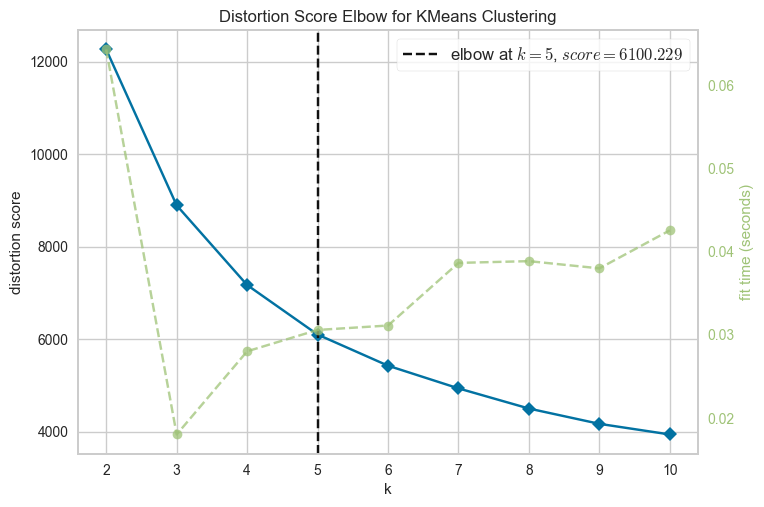

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
from yellowbrick.cluster import KElbowVisualizer
print('Método do cotovelo para determinar o número de clusters:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_pca)
Elbow_M.show()

### 6.1 Treinamento do modelo e a criação da nova feature de cluster

In [22]:
# Criando o objeto KMeans com 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Treinando o modelo com os dados pré-processados
kmeans.fit(df_pca)

# Obtendo as labels dos clusters para cada instância dos dados
labels = kmeans.predict(df_pca)

df1['Cluster'] = labels

### 7.0 Análise exploratória de cada Cluster

Entendendo as principais características dos indivíduos presentes nos Clusters, podemos utilizar uma estatística descritiva para isso 

In [24]:
grupos = df1.groupby('Cluster')[['Income', 'Spent', 'age']].describe().T
grupos

Cluster                  0              1              2             3              4
Income count    467.000000     318.000000     332.000000    665.000000     458.000000
       mean   57081.299786   75494.103774   75544.716867  31207.308271   42217.534934
       std    11959.447272   14788.004763   34776.564866  11825.161080   16936.763422
       min     2230.000000    2230.000000    2230.000000   1730.000000    2230.000000
       25%    51309.500000   69756.000000   67032.250000  23162.000000   33596.000000
       50%    57937.000000   75775.500000   74676.500000  31086.000000   42429.000000
       75%    64717.500000   82287.000000   80827.000000  38643.000000   50256.750000
       max    93404.000000  160803.000000  666666.000000  73395.000000  162397.000000
Spent  count    467.000000     318.000000     332.000000    665.000000     458.000000
       mean     755.124197    1439.188679    1250.328313     96.848120     146.659389
       std      321.676045     432.807243     399.907222    100.369901     122.590625
       min      235.000000     461.000000      62.000000      5.000000       6.000000
       25%      495.500000    1132.000000     976.000000     37.000000      46.000000
       50%      689.000000    1439.000000    1177.000000     60.000000     101.000000
       75%      965.500000    1749.250000    1532.250000    106.000000     234.500000
       max     1829.000000    2525.000000    2440.000000    680.000000     507.000000
age    count    467.000000     318.000000     332.000000    665.000000     458.000000
       mean      56.721627      44.393082      66.078313     44.673684      63.631004
       std        9.103814       8.031457       8.197333      6.404558       8.306313
       min       33.000000      28.000000      46.000000     27.000000      47.000000
       25%       49.000000      38.000000      61.000000     40.000000      58.000000
       50%       55.000000      45.000000      66.000000     45.000000      64.000000
       75%       64.000000      51.000000      71.250000     50.000000      69.000000
       max       79.000000      67.000000     124.000000     60.000000     130.000000

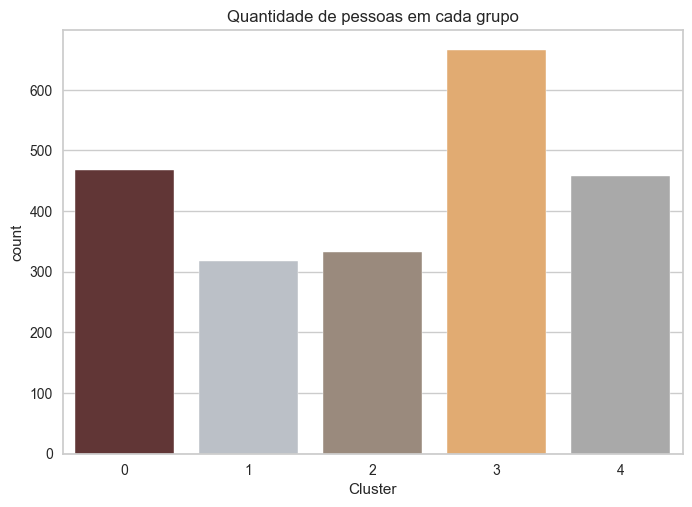

In [25]:
#Contagem de pessoas em cada Cluster
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60","#a9a9a9"]
pl = sns.countplot(x=df1["Cluster"], palette= pal)
pl.set_title("Quantidade de pessoas em cada grupo")
plt.show()

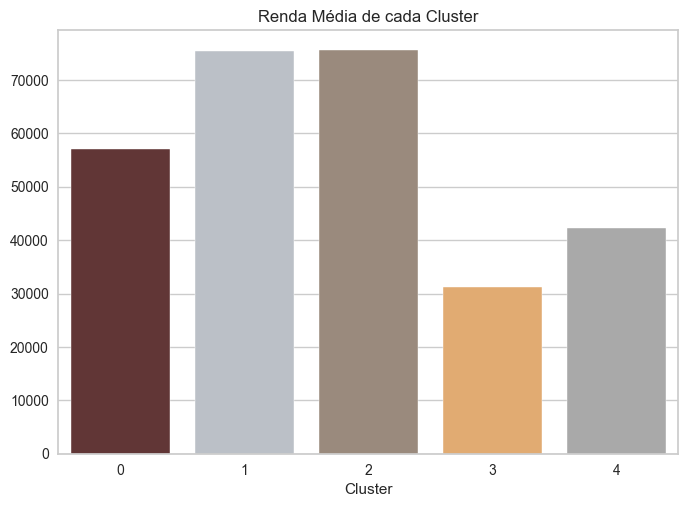

In [26]:
renda_cluster = df1.groupby('Cluster')['Income'].mean()
pl = sns.barplot(x=renda_cluster.index, y=renda_cluster.values, data=df1, palette=pal)
pl.set_title("Renda Média de cada Cluster")
plt.show()

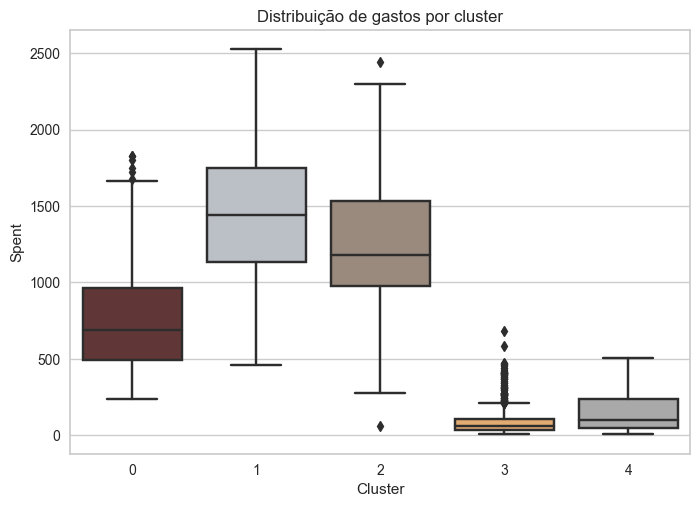

In [27]:
plt.figure()
pl=sns.boxplot(x=df1["Cluster"], y=df1["Spent"], palette=pal)
pl.set_title("Distribuição de gastos por cluster")
plt.show()

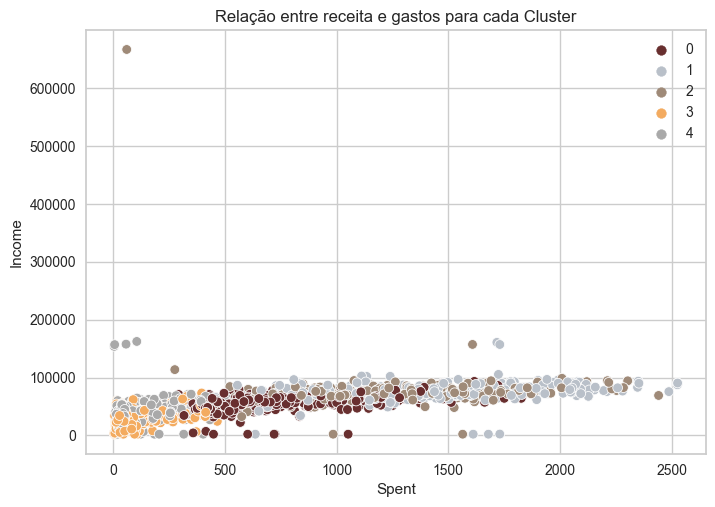

In [28]:
pl = sns.scatterplot(data = df1,x=df1["Spent"], y=df1["Income"],hue=df1["Cluster"], palette= pal)
pl.set_title("Relação entre receita e gastos para cada Cluster")
plt.legend()
plt.show()

Analisando a os boxplots dos Clusters em relação ao gasto podemos observar detalhes importantes
- Os integrantes do Cluster 1 e 2 são os que mais gastam.
- Os integrantes do Cluster 3 e 4 gastam pouco.

Podemos analisar as características de cada cluster e tentar entender o motivos

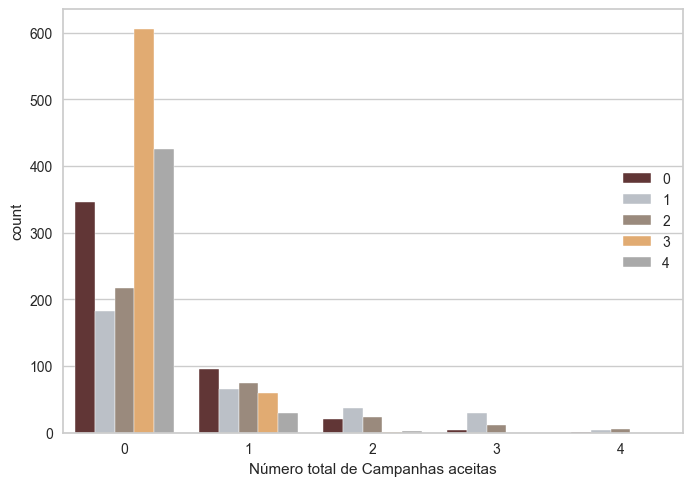

In [30]:
#Criando uma feature para encontrar o total de promoções
df1["Total_Promos"] = df1["AcceptedCmp1"]+ df1["AcceptedCmp2"]+ df1["AcceptedCmp3"]+ df1["AcceptedCmp4"]+ df1["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df1["Total_Promos"],hue=df1["Cluster"], palette= pal)
pl.set_xlabel("Número total de Campanhas aceitas")
plt.legend(loc="center right")
plt.show()


## Conclusões

Após uma análise detalhada dos nossos clientes, podemos identificar diferentes grupos e suas características, o que pode nos auxiliar a entender como cada um deles é impactado pelas campanhas e promoções, além de identificar quais grupos possuem maior potencial de compra.

- Os três primeiros grupos (0, 1 e 2) se destacam pela maior renda mensal e, portanto, são os grupos que mais se beneficiam das campanhas e promoções. São também os grupos que apresentam maior potencial de compra, o que torna importante o direcionamento de estratégias de marketing específicas para atingi-los.

- Por outro lado, os grupos 3 e 4 são mais populosos, mas possuem renda mensal menor. Dessa forma, a empresa pode estar atingindo um grande número de pessoas com suas campanhas publicitárias, mas não necessariamente atingindo seu público-alvo de forma eficiente. Isso pode ser uma estratégia menos rentável, já que esses grupos apresentam menor potencial de compra.

Portanto, é fundamental que a empresa leve em consideração essas informações ao planejar suas campanhas e promoções, direcionando esforços para os grupos com maior potencial de compra e avaliando a eficácia das estratégias adotadas. Isso pode contribuir para aumentar a rentabilidade das campanhas, além de gerar um impacto positivo nos resultados da empresa.